In [ ]:
#Code: EM algorithm implementation for different parameters
#Author: OUADGHIRI HASSANI Mohammed Youssef 
#Co-author: Sai Muttavarapu
#Class: Statistical learning for

## Instructions and libraries installation

In [1]:
# Tutorial EM for GMMs
# 
# 1) Implementing the EM
# 
# Implement (from scratch) the EM for a GMM on the variables 2 and 4 of the wine data set. Cluster the data and compare your results with k-means.
# An R file called "useful_functions.R" can be useful for EM. Apart from that, try not to use packages to implement EM.
# To assess the quality of the clustering, you may use the function classError and/or adjustedRandIndex from the Mclust package.
#
# 2) Model selection
# 
# Try to find a relevant nulmber of clusters using the three methods seen in class: AIC, BIC, and (cross-)validated likelihood.
# 
# 3) Towards higher dimensional spaces
# 
# Try to model more than just two variables of the same data set. Do you find the same clusters, the same number of clusters.
# 






#To execute the EM algorithm, we only need 4 equations: gamma, pi^^k, sigma^^k and mu^^k (see course)

#### First we load the data and look at it


install.packages('pgmm') ; 
install.packages('ggplot2');
install.packages('mclust') 
install.packages('mvtnorm')
library(mvtnorm)
library(pgmm)
library(ggplot2)
library(mclust)
data(wine)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Package 'mclust' version 5.4.7
Type 'citation("mclust")' for citing this R package in publications.


Attaching package: ‘mclust’


The following object is masked from ‘package:mvtnorm’:

    dmvnorm




In [2]:
#Useful functions
logsumexp<-function(x){
  y=max(x)
  y+log(sum(exp(x-y)))
}

## 1-d example

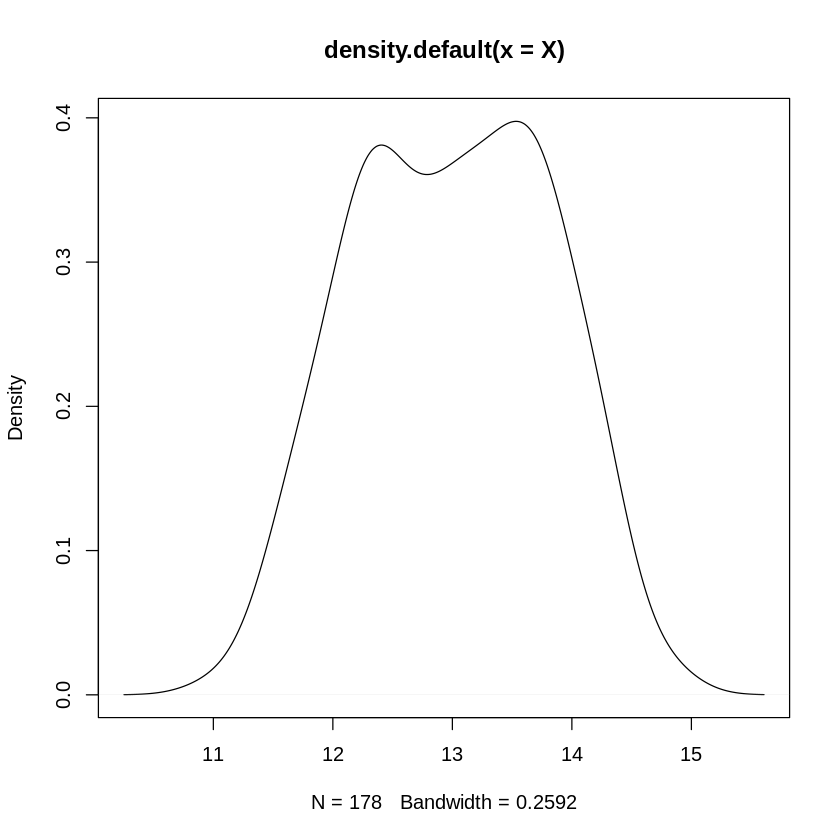

In [3]:
#Let's use the alcohol component as it has 2 local maxima
X=as.matrix(wine[2])
z = as.numeric(wine$Type!=1)+1 # for evaluation
plot(density(X))

In [4]:
#Parameters initialization
K=2
n= length(X)

mu=rnorm(K, c(mean(X)),sd=1) #moving from scalars to vectors in larger dimensions
prop=rep(1/K,K)
sigma= rep(1,K)
gamma= matrix(NA,n,K)
print(mu)

[1] 13.32757 12.31597


In [5]:
#Direct implementation for 1 dimension and 2 clusters (k=2)
means_1<-c() #stroring the means for plotting
means_2<-c()
log_likelihood<-c() #storing the likelihood values

for (i in 1:20){
    # E step
    log_gamma_numerator = matrix(nrow=n, ncol = K)
    
    for (k in 1:K){
        log_gamma_numerator[,k] = log(prop[k]) + dnorm(X,mu[k],sigma[k], log = TRUE)
    }
    
    ## normalize each line of gamma
    log_gamma = log_gamma_numerator - apply(log_gamma_numerator , 1, logsumexp)
    gamma = exp(log_gamma)
    
    # plot of the data and the means
    # Storing the log means for plotting the data and the means
    means_1<- c(means_1,mu[1])
    means_2<- c(means_2,mu[2])
    
    # M step
    for (k in 1:K){
      nk = sum(gamma[,k])
      prop[k] = nk / n
      mu[k] = sum(gamma[,k]*X) / nk
      sigma[k] = sqrt(sum(gamma[,k]*(X-mu[k])^2) / nk)
    }

    # Storing the log likelihood to evaluate it
    log_likelihood = c(log_likelihood,sum(apply(log_gamma_numerator , 1, logsumexp)))

}

# Calculating the clusters
post <- gamma #Posterior
class <- sapply(seq(nrow(post)), function(i) { j <- which.max(as.vector(post[i,])) }) #Change our probabilities into cluster attribution

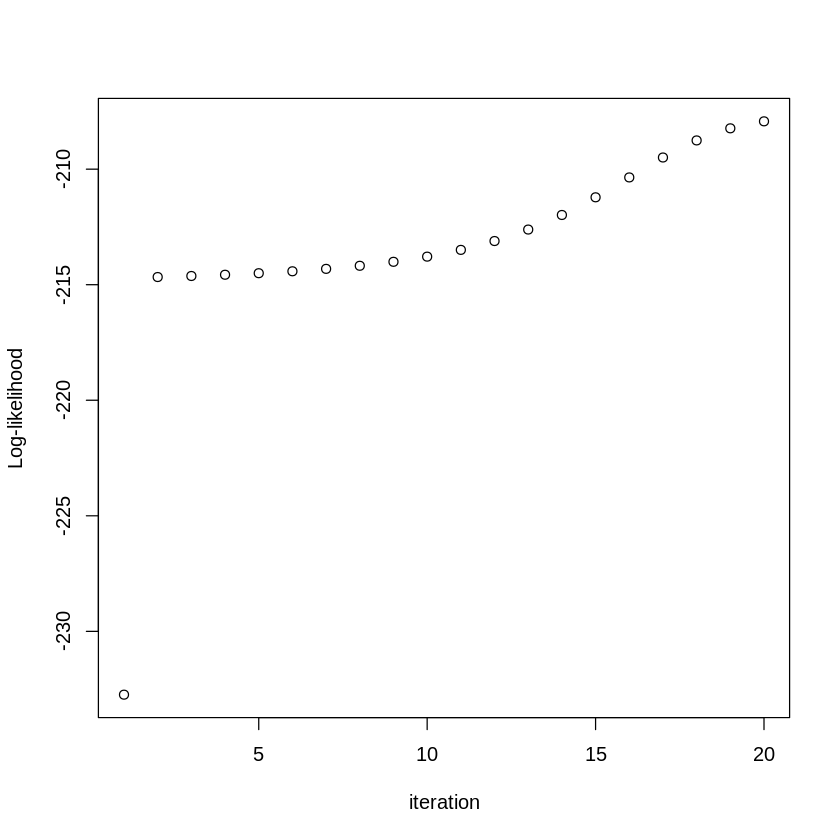

In [6]:
plot(log_likelihood, ylab='Log-likelihood', xlab='iteration')
#Evaluating that the log likelihood keeps growing until convergence

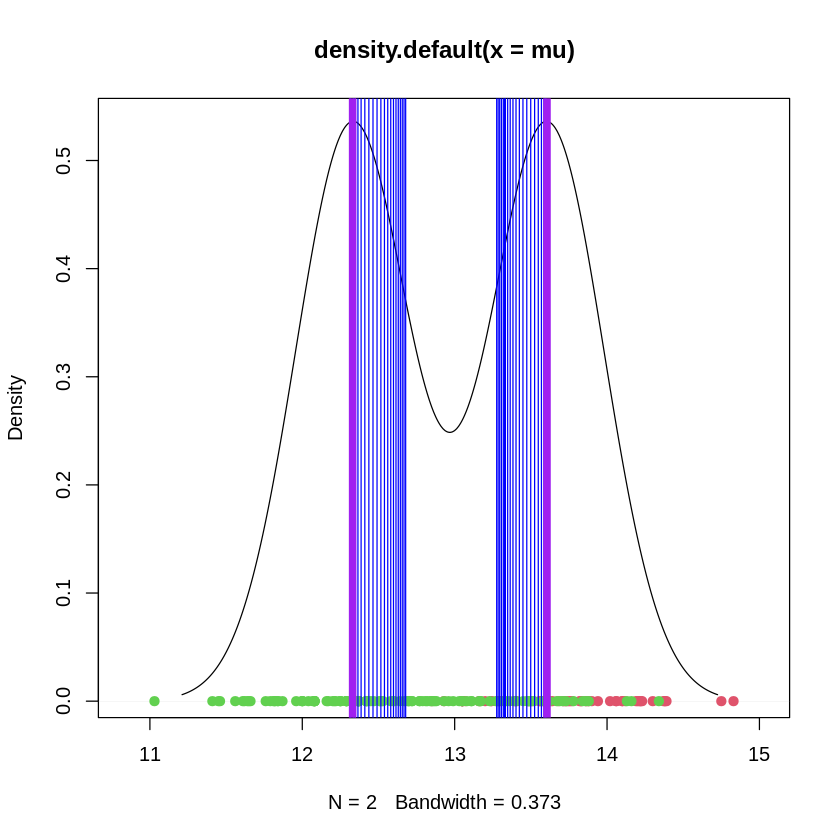

In [7]:
# we see how the mean converged to our new normal distributions (each distribution is for a cluster)
plot(density(mu), xlim = c(min(X)-0.2,max(X)+0.2))
points(X,rep(0,178),col=z+1,pch=19)
abline(v=means_1,col="blue")
abline(v=means_2,col="blue")
abline(v=mu,col="purple",lwd=6)

# In blue we see the steps before convergence, in purple the final convergence point
# The data is plotted according to the type in the y=0 axis for reference

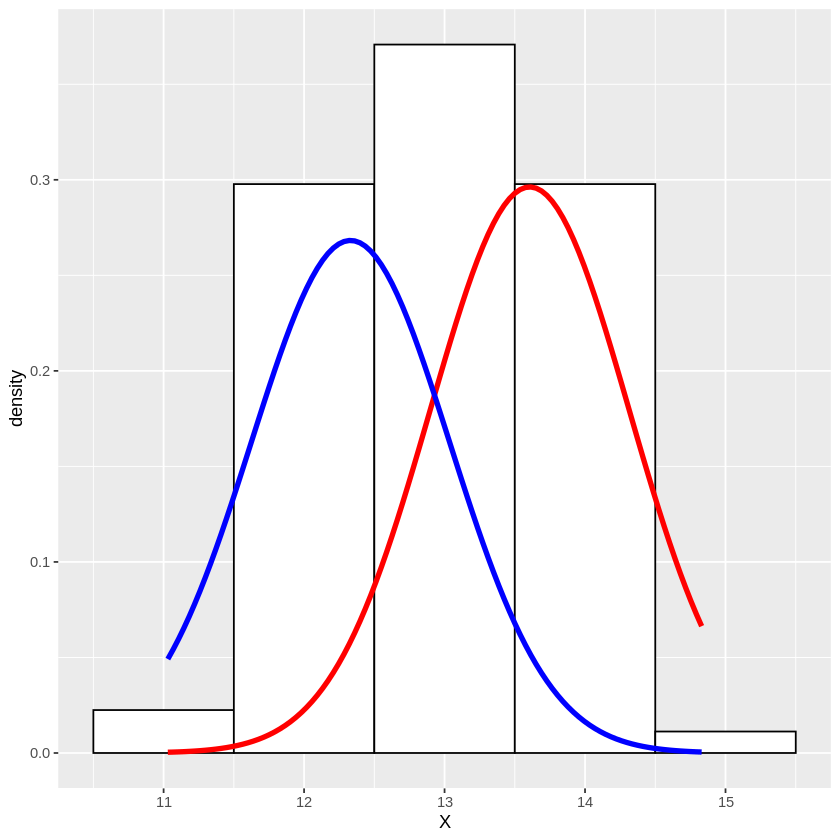

In [8]:
# We further plot the two clusters ditributions in a separate way for clearer visualization
# Using ggplot for more visibility and showing the density of the points
plot_mix_comps <- function(x, mu, sigma, w) {
  w * dnorm(x, mu, sigma)
}

ggplot() +
  geom_histogram(aes(X, ..density..), binwidth = 1, colour = "black", fill = "white") + #X data density plot
  stat_function(geom = "line", fun = plot_mix_comps,args = list(mu[1], sqrt(sigma[1]), prop[1]),colour = "red", lwd = 1.5) + 
  stat_function(geom = "line", fun = plot_mix_comps,args = list(mu[2], sqrt(sigma[2]),prop[2]),colour = "blue", lwd = 1.5)

$misclassified
 [1]  22  24  63  67  69  72  73  74  77  84 124 139 142 143 144 146 147 149 150
[20] 151 153 154 156 157 159 160 162 164 165 166 167 169 170 173 174 175 176 177
[39] 178

$errorRate
[1] 0.2191011

[1] 0.3119352

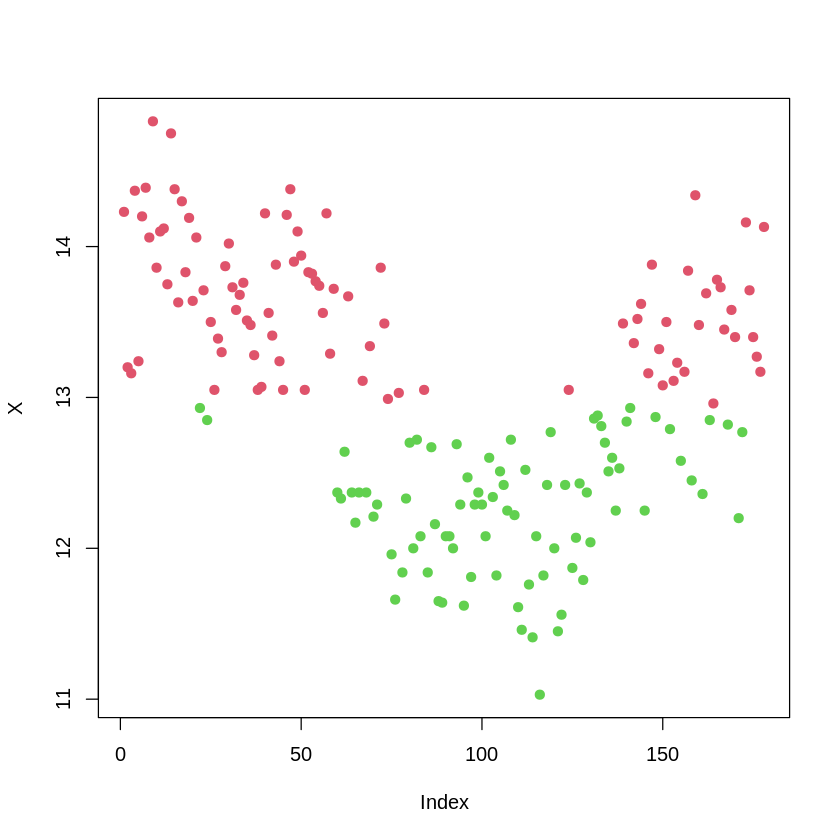

In [9]:
#Evaluating our model

plot(X,col=class+1,pch=19)

#Using the Mclust library
classError(class, z)
adjustedRandIndex(class,z)


$misclassified
 [1]  22  24  63  67  69  72  73  74  77  84 124 139 142 143 144 146 147 149 150
[20] 151 153 154 156 157 159 160 162 165 166 167 169 170 173 174 175 176 177 178

$errorRate
[1] 0.2134831

[1] 0.3248384

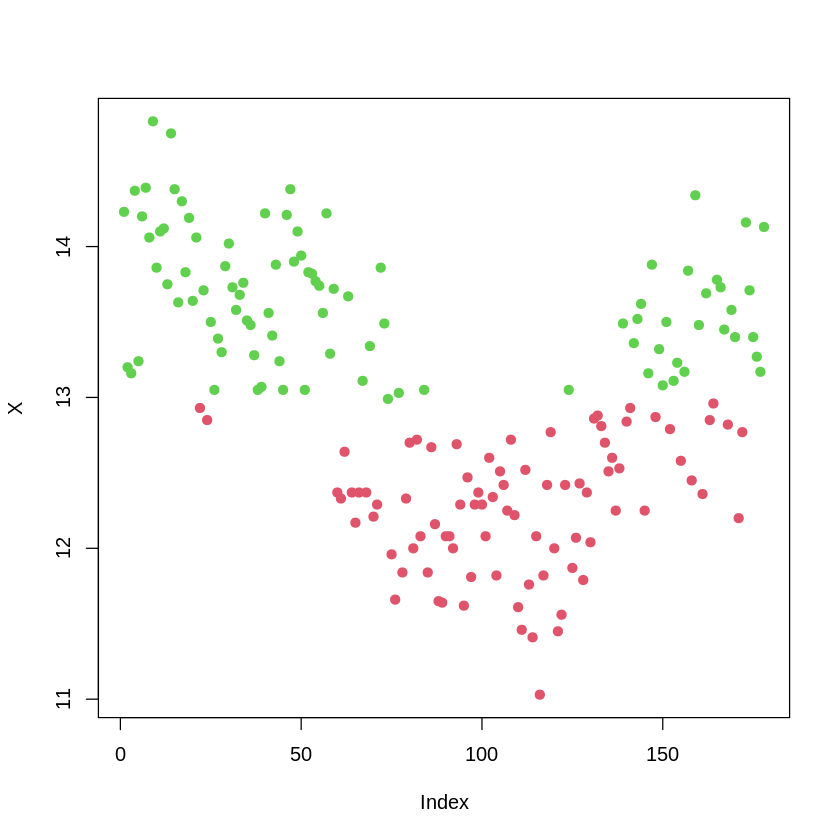

In [10]:
# Kmean accuracy for comparison
km <- kmeans(X, centers=2)
plot(X,col=km$cluster+1,pch=19)

#Using the Mclust library
classError(km$cluster, z)
adjustedRandIndex(km$cluster,z)


## 2-d implementation

In [30]:
#We take 2 columns from data (2 dimensions)
X=as.matrix(wine[,c(2,4)])
z = as.numeric(wine$Type!=1)+1 # for evaluation


In [31]:
#Implementation

#Building the EM algorithm in a function to adapt to dimensions and clusters
EmAlgo<- function(X,K,n=nrow(X),iter=20){

    #initialization
    likelihood <- c()
    mu=rmvnorm(K, c(colMeans(X)),cov(X)) #moving from scalars to vectors in larger dimensions, using rmvnorm for multidimension
    prop=rep(1/K,K)
    sigma= lapply(1:K, function(i) diag(dim(X)[2]))
    gamma= matrix(NA,n,K)
    # print(mu)
    # print(sigma)


    for (i in 1:iter){
        # E step
        log_gamma_numerator = matrix(nrow=n, ncol = K)

        for (k in 1:K){
            log_gamma_numerator[,k] = log(prop[k]) + matrix(dmvnorm(X,mu[k,],sigma[[k]],log=TRUE))
        }
        ## normalize each line of gamma
        log_gamma = log_gamma_numerator - apply(log_gamma_numerator , 1, logsumexp)
        gamma = exp(log_gamma)

        # M step
        for (k in 1:K){
            nk = sum(gamma[,k])
            prop[k] = nk / n
            mu[k,] = Reduce("+", lapply(1:n, function(i) gamma[i,k]*X[i,])) / nk
            sigma[[k]] = Reduce("+",lapply(1:n,function(i) gamma[i,k]*(X[i,]-mu[k,])%*%t(X[i,]-mu[k,]))) / nk

            likelihood = append(likelihood,gamma[,k]*as.vector(log(prop[k]) + dmvnorm(X, mean=mu[k,], sigma[[k]], log=TRUE)))
        }
      likelihood = array(likelihood, dim=c(n, K))
      
    }
  return(list("gamma"=gamma,"prop"=prop,"mu"=mu,"sigma"=sigma,"likelihood"=likelihood))
}

result=EmAlgo(X,K=2,n)

$misclassified
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
[51] 51 52 53 54 55 56 57 58 59

$errorRate
[1] 0.3314607

[1] 0.02313953

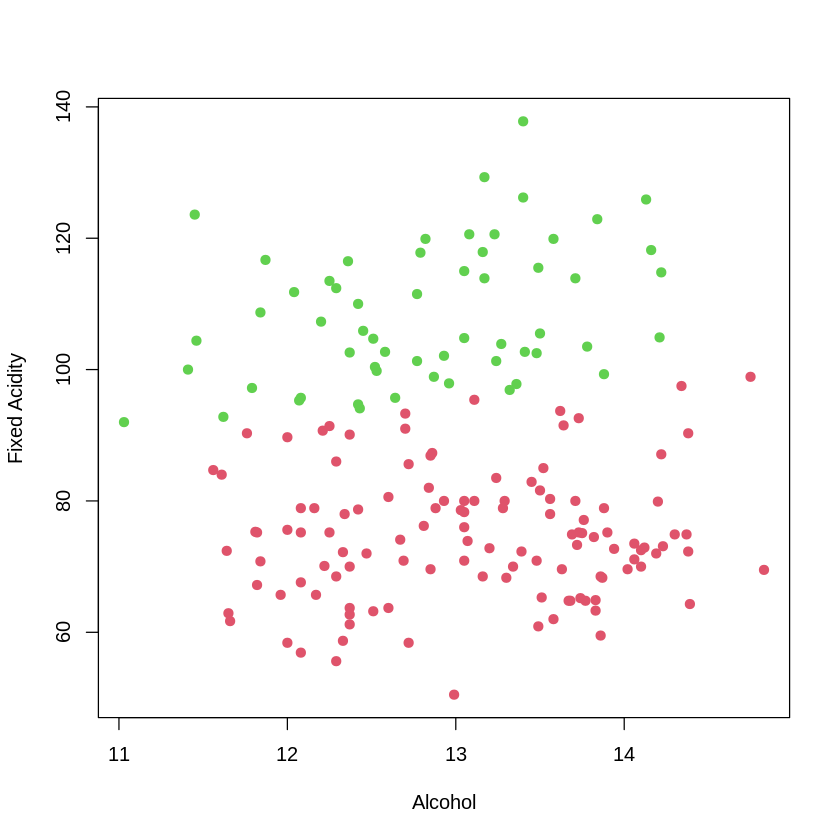

In [32]:
#Evaluating our model
post <- result$gamma
class <- sapply(seq(nrow(post)), function(i) { j <- which.max(as.vector(post[i,])) })

#plotting the result
plot(X,col=class+1,pch=19)

#Using the Mclust library
classError(class, z)
adjustedRandIndex(class,z)


$misclassified
 [1]  14  20  22  40  42  44  46  47  61  63  64  65  66  67  68  69  71  72  73
[20]  74  75  76  77  79  81  82  83  85  86  87  88  89  90  91  92  93  94  96
[39]  97  98  99 101 102 103 104 105 106 107 108 109 110 117 122 131 132 133 136
[58] 140 141 143 162 163 167

$errorRate
[1] 0.3539326

[1] 0.07706346

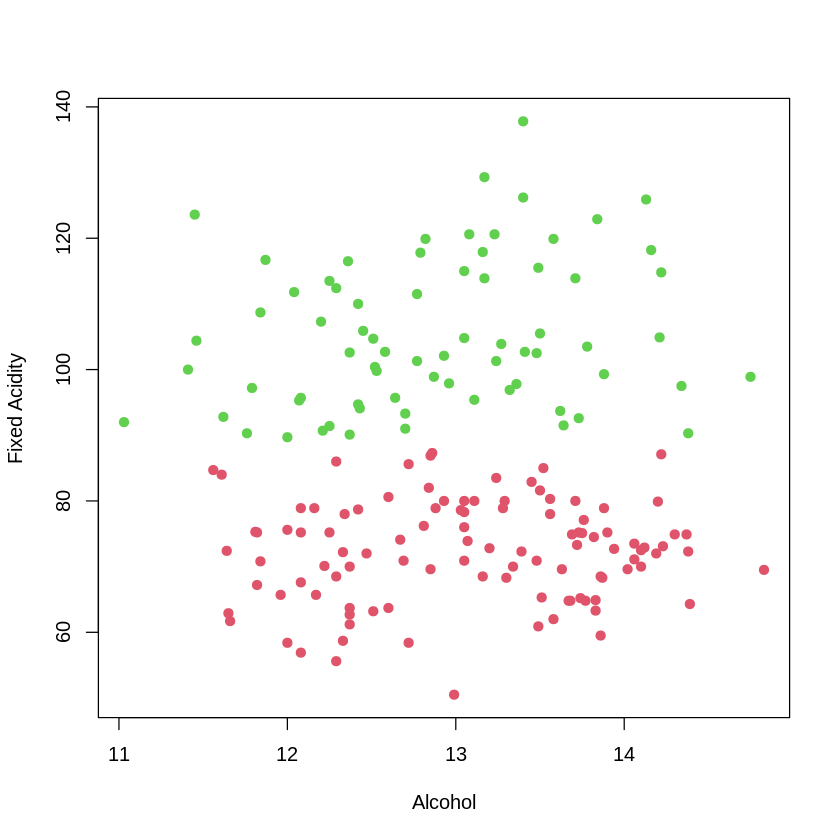

In [33]:
# Kmean accuracy for comparison
km <- kmeans(X, centers=2)

#plotting the Kmeans clustering
plot(X,col=km$cluster+1,pch=19)

#Evaluating using Mclust
classError(km$cluster, z)
adjustedRandIndex(km$cluster,z)


In [36]:
#AIC

#We compute AIC for different numbers of clusters, the higher the log likelihood the better
for (j in 2:12){
    result = EmAlgo(X, K=j, n=n) #Execute EM for different number of clusters
    cols= dim(X)[2]
    sum_lik=sum(result$likelihood) 
    aic =  sum_lik - ((j-1) + j*cols + j*((cols*(cols+1))/2))
    print(c(j,aic))
}

[1]    2.0000 -986.5929
[1]     3.000 -1011.796
[1]     4.000 -1018.848
[1]     5.000 -1021.356
[1]     6.000 -1054.656
[1]     7.000 -1033.781
[1]     8.000 -1042.162
[1]     9.000 -1055.516
[1]    10.000 -1048.903
[1]    11.000 -1068.191
[1]    12.000 -1091.321


In [40]:
#BIC

#We compute BIC for different numbers of clusters, the lowest the log likelihood the better

for (k in 2:12){
    result = EmAlgo(X, K=k, n=n)
    cols=dim(X)[2]
    pena = ((k-1) + cols*k + k*((cols*(cols+1))/2))
    sum_lik=sum(result$likelihood) 

    bic=sum_lik - (1/2 * pena * log(n))
    print(c(k,bic))
}

[1]     2.000 -1015.661
[1]     3.000 -1028.656
[1]     4.000 -1046.382
[1]     5.000 -1059.895
[1]     6.00 -1087.71
[1]     7.00 -1086.85
[1]     8.000 -1117.867
[1]     9.000 -1140.122
[1]    10.000 -1137.413
[1]    11.000 -1183.647
[1]    12.000 -1183.308


## 2-d implementation for 3 clusters

In [41]:
#initialization 
X=as.matrix(wine[,c(2,4)])
z=as.numeric(wine$Type) #For evaluation

In [42]:
#Implementation
result=EmAlgo(X,K=3,n=n)

$misclassified
 [1]   5  14  20  22  40  42  44  46  47  57  61  63  64  65  66  67  68  69  71
[20]  72  73  74  75  76  77  78  79  81  82  83  85  86  87  88  89  90  91  92
[39]  93  96  97  98  99 100 101 102 103 104 105 106 107 109 117 121 123 124 125
[58] 130 131 132 133 134 135 136 137 138 140 141 142 143 144 147 148 149 151 153
[77] 155 158 159 160 162 163 164 165 166 167 176

$errorRate
[1] 0.488764

[1] 0.1492959

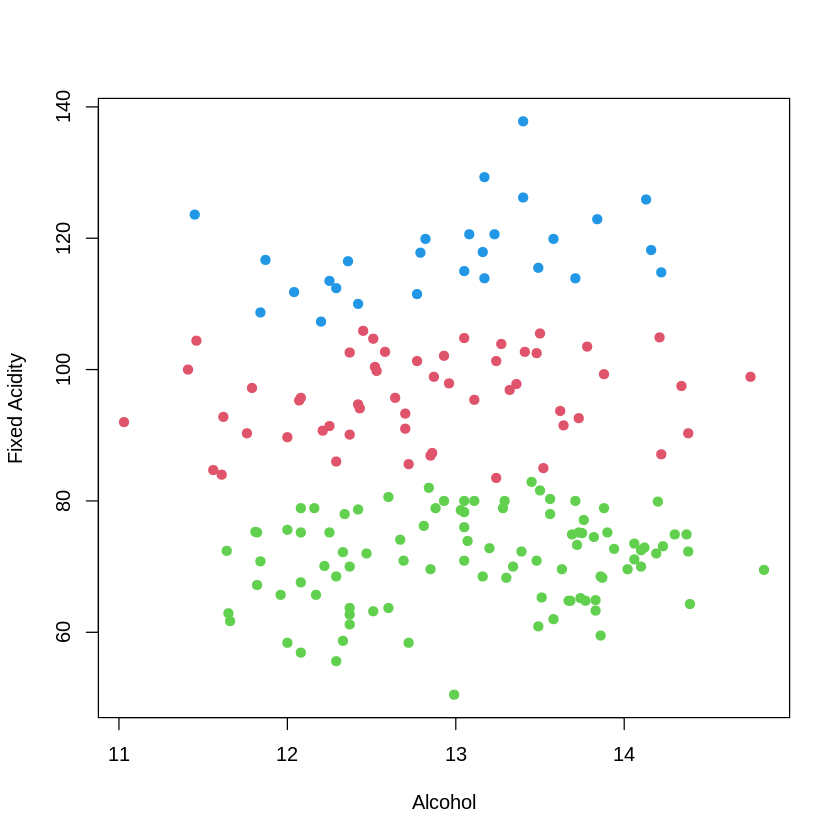

In [44]:
#Evaluating our model

post <- result$gamma
class <- sapply(seq(nrow(post)), function(i) { j <- which.max(as.vector(post[i,])) })

# Kmean accuracy for comparison
km <- kmeans(X, centers=3)

#plotting the clusters of EM
#We also evaluate the models using the Mclust library
plot(X,col=km$cluster+1,pch=19)
classError(km$cluster, z)
adjustedRandIndex(km$cluster,z)


$misclassified
 [1]  14  20  22  40  42  44  46  47  57  60  62  63  67  69  70  72  73  77  78
[20]  80  84  86  87  93  94  95 100 103 106 108 110 111 112 113 114 115 116 118
[39] 119 120 121 122 123 124 125 126 127 128 129 130 132 133 136 140 141 143 162
[58] 167

$errorRate
[1] 0.3258427

[1] 0.2847887

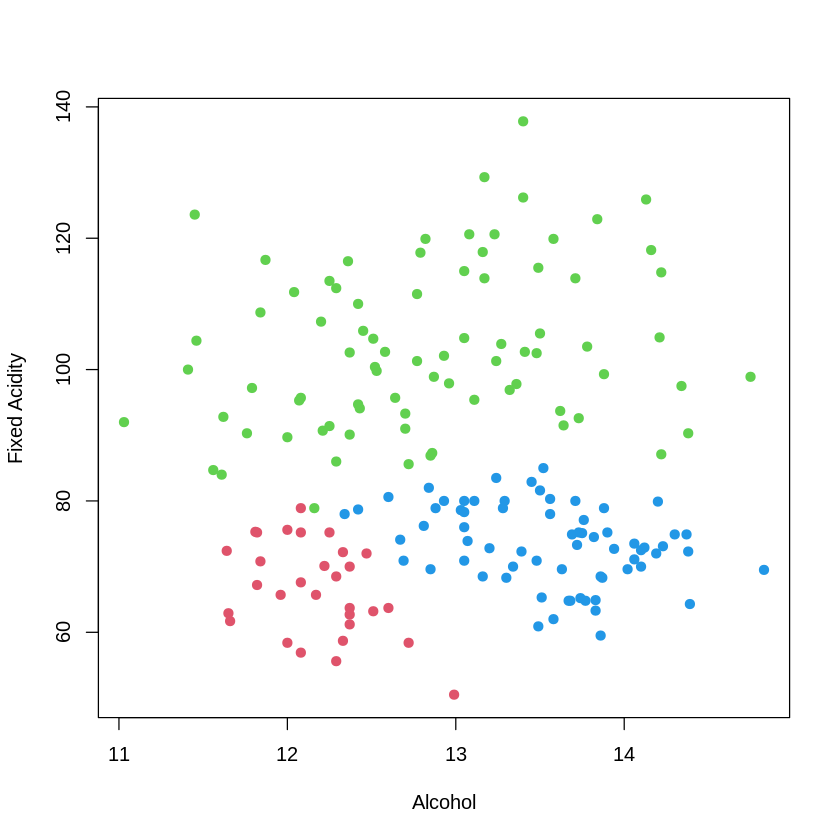

In [45]:
#Kmeans results
plot(X,col=class+1,pch=19)
classError(class, z)
adjustedRandIndex(class,z)


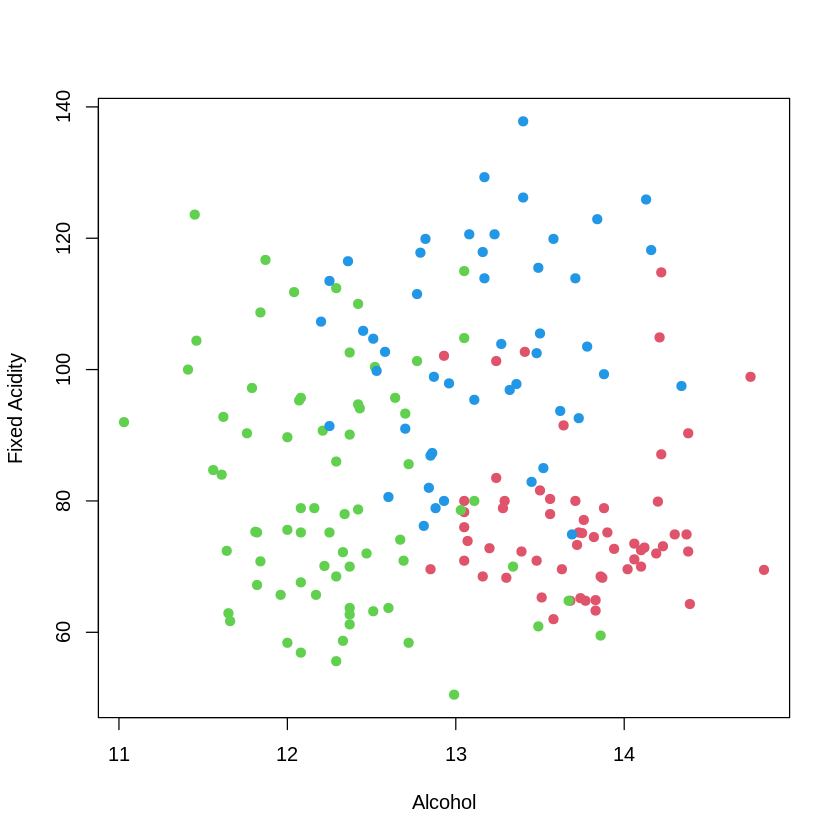

In [46]:
#PLotting labels
plot(X,col=z+1,pch=19)


In [47]:
#AIC

#We compute AIC for different numbers of clusters, the higher the log likelihood the better
for (j in 2:12){
    result = EmAlgo(X, K=j, n=n) #Execute EM for different number of clusters
    cols= dim(X)[2]
    sum_lik=sum(result$likelihood) 
    aic =  sum_lik - ((j-1) + j*cols + j*((cols*(cols+1))/2))
    print(c(j,aic))
}

#According to AIC here, 6 clusters is the best option

[1]    2.0000 -989.3199
[1]     3.000 -1002.741
[1]     4.000 -1009.846
[1]     5.000 -1025.837
[1]    6.0000 -803.7159
[1]     7.000 -1003.049
[1]     8.00 -1062.09
[1]     9.00 -1068.43
[1]    10.000 -1075.409
[1]    11.000 -1070.086
[1]    12.000 -1079.408


In [48]:
#BIC

#We compute BIC for different numbers of clusters, the lowest the log likelihood the better

for (k in 2:12){
    result = EmAlgo(X, K=k, n=n)
    cols=dim(X)[2]
    pena = ((k-1) + cols*k + k*((cols*(cols+1))/2))
    sum_lik=sum(result$likelihood) 

    bic=sum_lik - (1/2 * pena * log(n))
    print(c(k,bic))
}

[1]     2.000 -1013.987
[1]     3.000 -1035.657
[1]     4.00 -1044.52
[1]     5.000 -1060.064
[1]     6.000 -1098.173
[1]     7.000 -1105.689
[1]     8.000 -1117.512
[1]     9.000 -1126.484
[1]    10.000 -1142.102
[1]    11.000 -1172.152
[1]    12.000 -1169.332


## Multiple variables for 2 clusters

In [57]:
#initialization 
X=as.matrix(wine[,c(2,4,10,17,20)]) #We take 5 values
z = as.numeric(wine$Type!=1)+1 # for evaluation

In [58]:
#Implementation
result=EmAlgo(X,K=2,n)

In [59]:
post <- result$gamma #getting the posterior
class <- sapply(seq(nrow(post)), function(i) { j <- which.max(as.vector(post[i,])) }) #Changing the probabilities into cluster attribution

$misclassified
 [1]  14  20  22  40  42  44  46  47  61  63  64  65  66  67  68  69  71  72  73
[20]  74  75  76  77  79  81  82  83  85  86  87  88  89  90  91  92  93  94  96
[39]  97  98  99 101 102 103 104 105 106 107 108 109 110 117 122 131 132 133 136
[58] 140 141 143 162 163 167

$errorRate
[1] 0.3539326

[1] 0.07706346

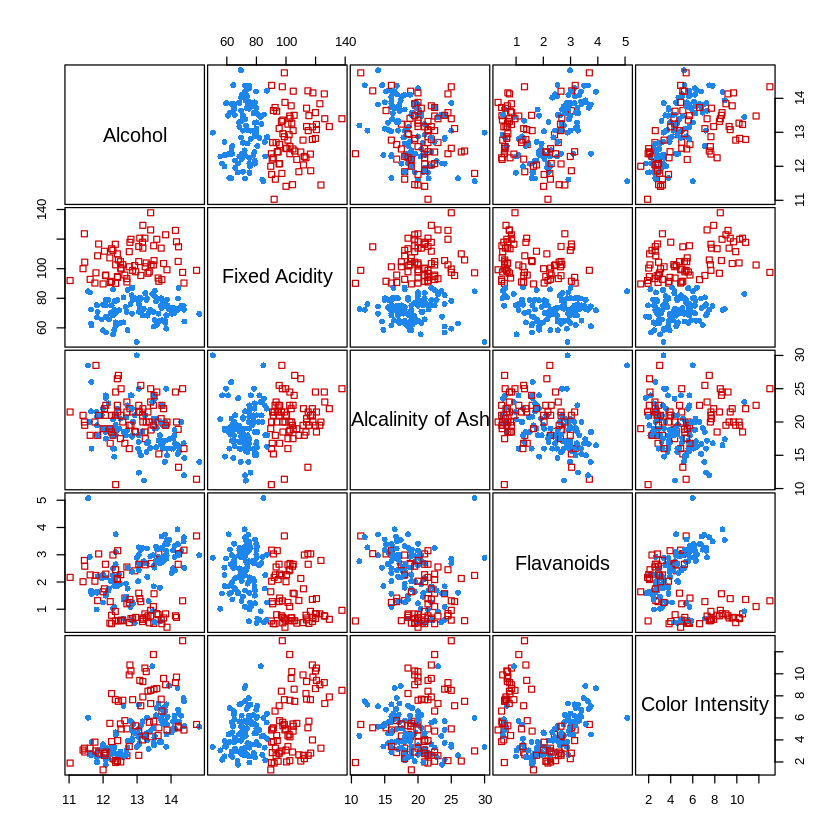

In [60]:
# Performing Kmean for comparison
km <- kmeans(X, centers=2)

clPairs(X,km$cluster+1)
classError(km$cluster,z)
adjustedRandIndex(km$cluster,z)


$misclassified
 [1]  62  70  78  84  92 113 114 119 121 123 130 131 132 133 134 135 136 137 138
[20] 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
[39] 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
[58] 177 178

$errorRate
[1] 0.3314607

[1] 0.09039291

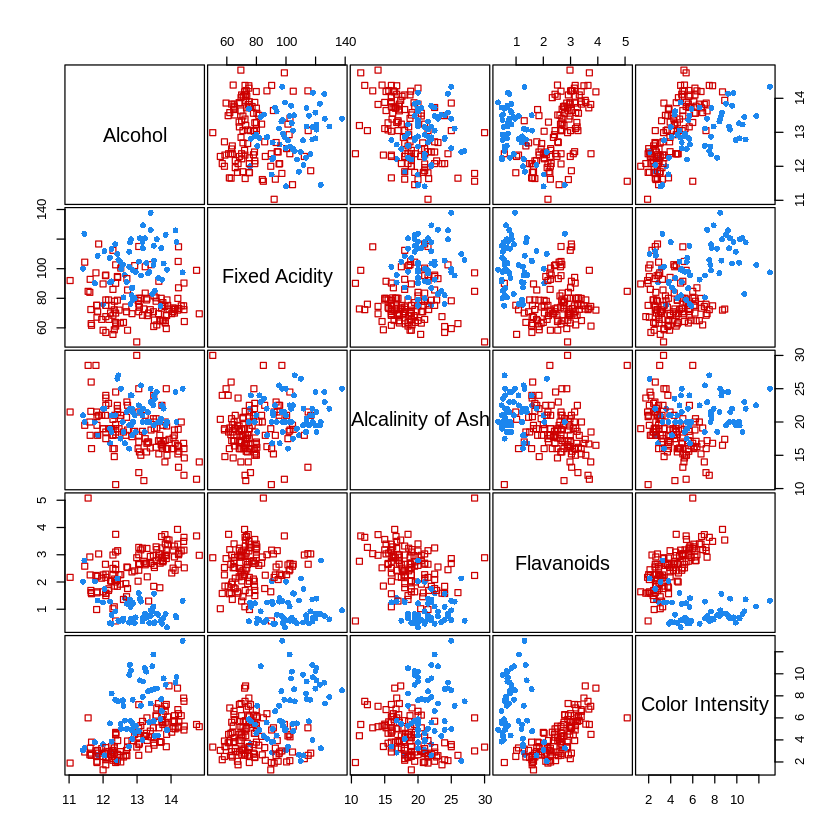

In [61]:
#Evaluating the 5 dimensions model
clPairs(X,class+1)
classError(class, z)
adjustedRandIndex(class,z)


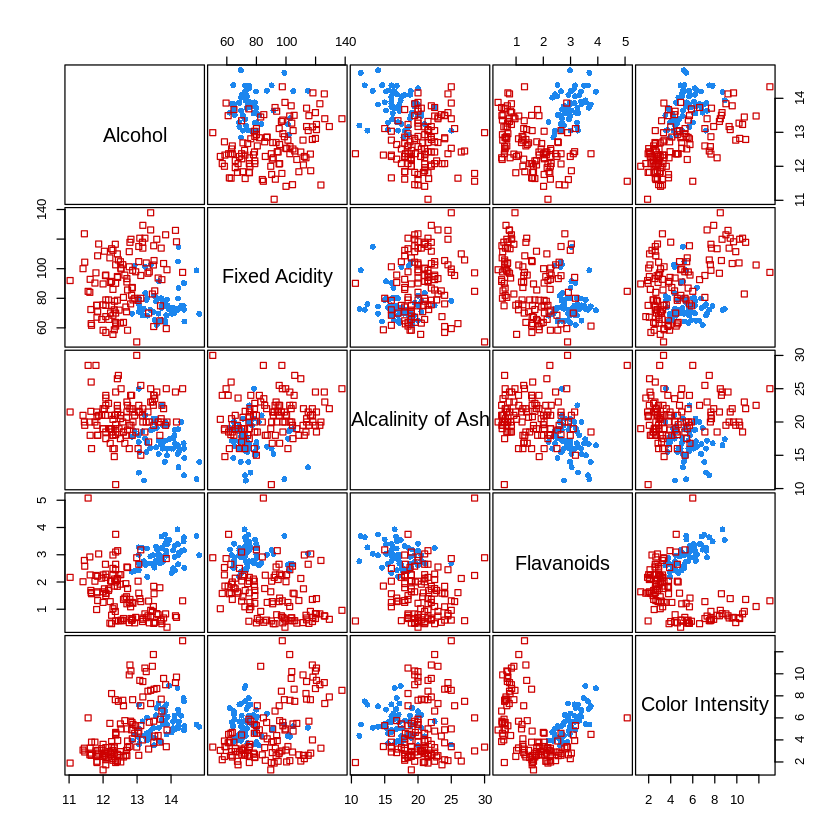

In [62]:
#plotting labels
clPairs(X,z)

In [63]:
#AIC

#We compute AIC for different numbers of clusters, the higher the log likelihood the better
for (j in 2:12){
    result = EmAlgo(X, K=j, n=n) #Execute EM for different number of clusters
    cols= dim(X)[2]
    sum_lik=sum(result$likelihood) 
    aic =  sum_lik - ((j-1) + j*cols + j*((cols*(cols+1))/2))
    print(c(j,aic))
}

[1]     2.000 -2023.675
[1]     3.000 -1974.389
[1]     4.000 -2013.228
[1]     5.000 -2018.991
[1]     6.000 -2028.081
[1]     7.000 -2024.684
[1]     8.000 -2032.529
[1]     9.000 -2034.786
[1]    10.000 -2068.472
[1]    11.00 -2020.67
[1]    12.000 -2057.069


In [64]:
#BIC

#We compute BIC for different numbers of clusters, the lowest the log likelihood the better

for (k in 2:12){
    result = EmAlgo(X, K=k, n=n)
    cols=dim(X)[2]
    pena = ((k-1) + cols*k + k*((cols*(cols+1))/2))
    sum_lik=sum(result$likelihood) 

    bic=sum_lik - (1/2 * pena * log(n))
    print(c(k,bic))
}

[1]     2.000 -2059.192
[1]     3.000 -2096.393
[1]     4.000 -2135.701
[1]     5.000 -2192.325
[1]     6.000 -2206.272
[1]     7.000 -2244.837
[1]     8.000 -2309.158
[1]     9.00 -2353.76
[1]    10.0 -2367.5
[1]    11.000 -2425.089
[1]    12.000 -2431.964


## Multiple variables for 3 clusters

In [65]:
#The main data being divided into 3 types of wine, evaluation will be inaccurate if we take a higher number of clusters

#initialization 
X=as.matrix(wine[,c(8,10,13,17,20)])
z=as.numeric(wine$Type)

In [66]:
#Implementation of EM
result=EmAlgo(X,K=3,n=nrow(X))

$misclassified
 [1]  13  14  27  28  42  51  52  61  62  65  66  69  70  71  74  75  76  78  79
[20]  80  86  95  96  97 101 103 111 113 118 121 122 123 131 132 133 134 135 136
[39] 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
[58] 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174
[77] 175 176 177 178

$errorRate
[1] 0.4494382

[1] 0.1184136

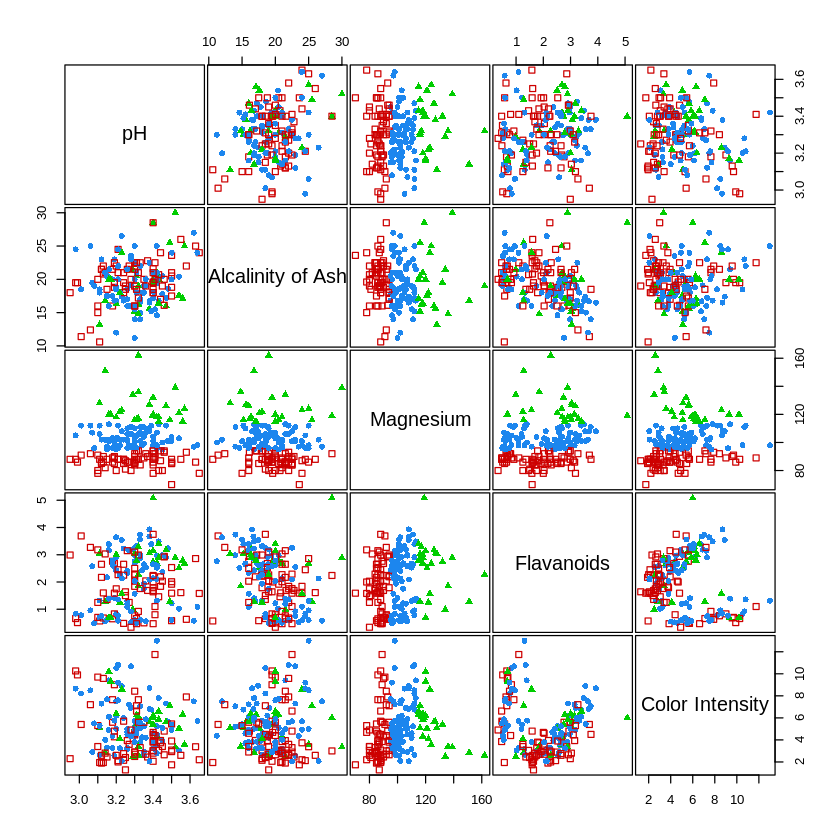

In [67]:
#Evaluating our model
post <- result$gamma
class <- sapply(seq(nrow(post)), function(i) { j <- which.max(as.vector(post[i,])) })

# Kmeans for comparison
km <- kmeans(X, centers=3)

clPairs(X,km$cluster+1)
classError(km$cluster, z)
adjustedRandIndex(km$cluster,z)


$misclassified
 [1]  13  14  24  25  28  42  61  62  65  66  69  70  74  76  78  79  86  95  96
[20]  97  99 113 122 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
[39] 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
[58] 165 166 167 168 169 170 171 172 173 174 175 176 177 178

$errorRate
[1] 0.3988764

[1] 0.2030817

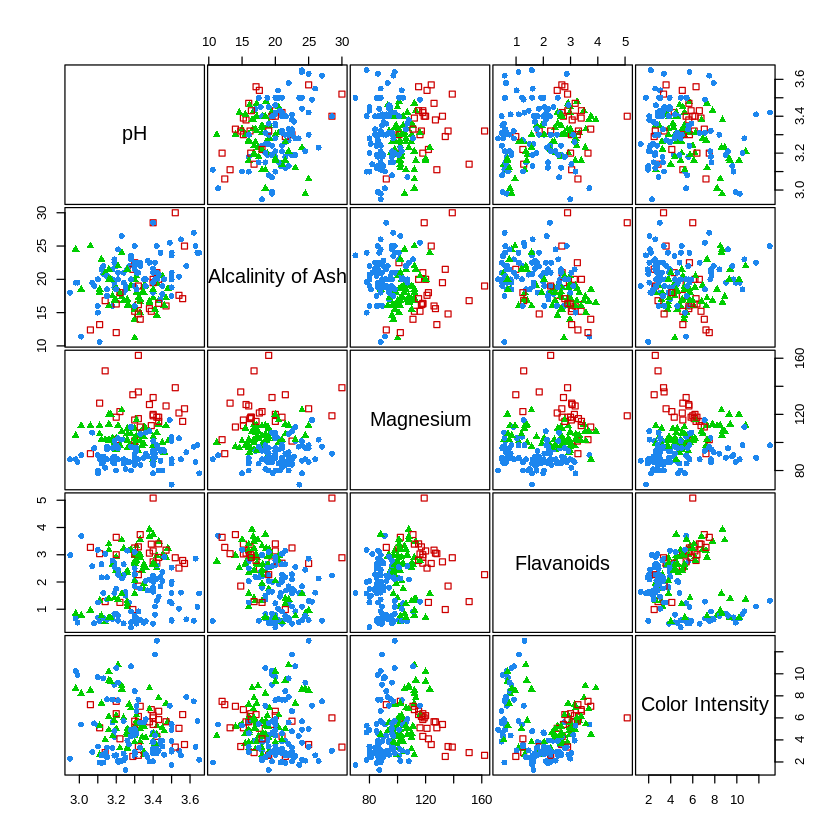

In [68]:
#EM clustering evaluation
clPairs(X,class+1)
classError(class, z)
adjustedRandIndex(class,z)


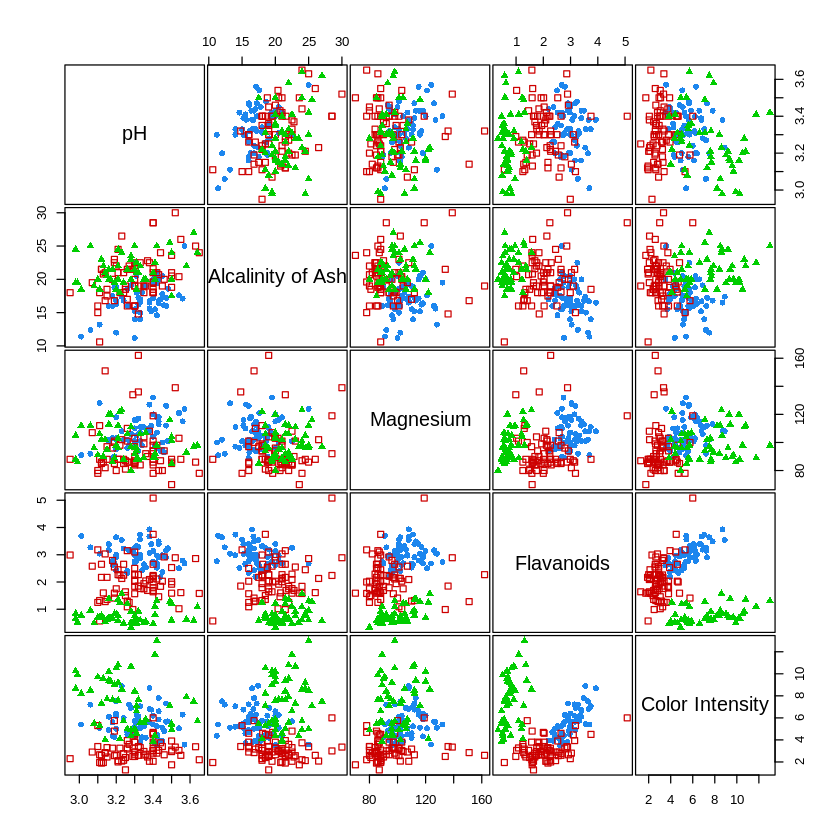

In [69]:
#Plotting real values
clPairs(X,z+1)